In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *
import numpy as np
import pandas as pd
from markov_models.experiments import exp1

from utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

In [12]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(7)]

main_folder = 'availability_matrices/av-mat-3'

formatted_array = [i for i in range(n_rounds)]

In [13]:
def pipeline(exp_type, key_word, folder):
    res_exp = res[exp_type]

    availability_matrix = pd.DataFrame(res_exp, index = countries, columns = formatted_array)

    plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
    availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

    print("Clients' participation frequencies: ", res_exp.mean(axis=1))

    lam2_list, corr = av_mat_corr(availability_matrix)
    print('Countries lambda_2: ',list(np.round(lam2_list, 2)))
    print('Mean lambda_2: ',np.round(corr, 2))

In [14]:
res = exp1(t=50, T=100,_eps=0.25)
sub_folder='50perc'

# Correlated case

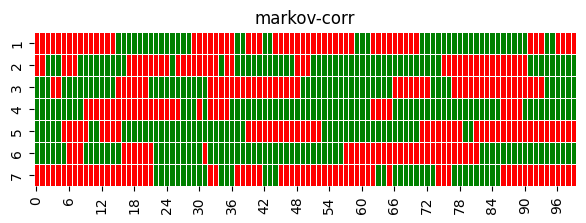

Clients' participation frequencies:  [0.43 0.58 0.51 0.69 0.5  0.65 0.35]
Countries lambda_2:  [0.75, 0.73, 0.8, 0.77, 0.82, 0.82, 0.73]
Mean lambda_2:  0.77


In [15]:
pipeline(exp_type=CORR, key_word='markov-corr-50perc', folder=main_folder+'/'+sub_folder)

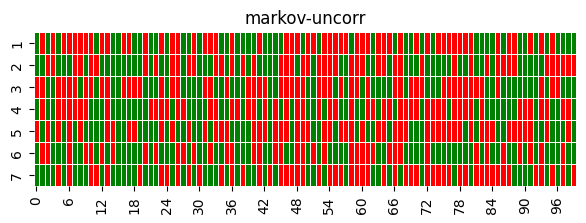

Clients' participation frequencies:  [0.46 0.53 0.47 0.47 0.46 0.61 0.47]
Countries lambda_2:  [-0.06, 0.09, 0.17, 0.03, -0.04, -0.1, -0.11]
Mean lambda_2:  -0.0


In [16]:
pipeline(exp_type=UNCORR, key_word='markov-uncorr-50perc', folder=main_folder+'/'+sub_folder)

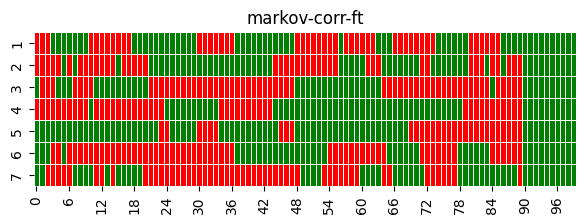

Clients' participation frequencies:  [0.54 0.57 0.41 0.56 0.7  0.43 0.47]
Countries lambda_2:  [0.73, 0.61, 0.79, 0.85, 0.81, 0.79, 0.68]
Mean lambda_2:  0.75


In [17]:
pipeline(exp_type=CORR_FT, key_word='markov-corr-ft-50perc', folder=main_folder+'/'+sub_folder)

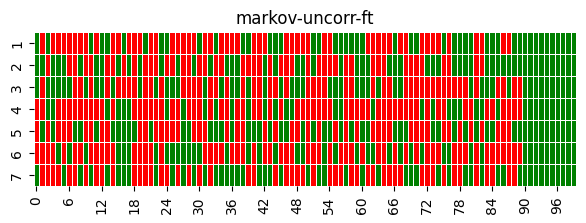

Clients' participation frequencies:  [0.47 0.54 0.49 0.37 0.53 0.43 0.5 ]
Countries lambda_2:  [0.27, 0.15, 0.11, 0.15, 0.01, 0.07, -0.01]
Mean lambda_2:  0.11


In [18]:
pipeline(exp_type=UNCORR_FT, key_word='markov-uncorr-ft-50perc', folder=main_folder+'/'+sub_folder)

## Tests to verify the participation frequency in the correlated case

(array([  2.,  38., 112., 216., 172., 118.,  36.,   6.,   0.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 9 artists>)

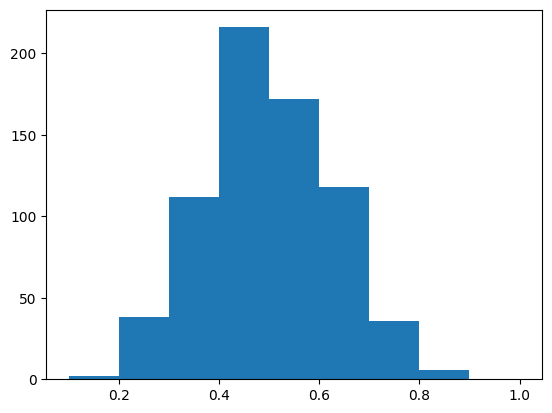

In [19]:
fin_res = [
    exp1(t=50, T=100, k=10, _eps=0.25)['corr']
    for _ in range(100)
]
tmp = np.sum(np.vstack(fin_res), axis=-1)/100

plt.hist(tmp, bins=[(i+1)/10 for i in range(10)])
# plt.savefig("Corr_0_01__1.png")

In [20]:
# plt.figure(figsize=(12, 12))  # Set the figure size here
# plt.imshow(tmp, cmap='binary')  # Display the image
# plt.savefig("tmp.png")